In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msg
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('deliveries.csv')
df1 = pd.read_csv('matches.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
df1.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

# Ques 1 -Win ?

In [7]:
both_team = df1[((df1['team1'] == 'Kings XI Punjab') & (df1['team2'] == 'Kolkata Knight Riders')) | ((df1['team1'] == 'Kolkata Knight Riders') & (df1['team2'] == 'Kings XI Punjab'))]
both_team

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
47,48,2017,Chandigarh,2017-05-09,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",A Nand Kishore,S Ravi,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN
111,112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens,SJ Davis,I Shivram,NaN
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,NaN
141,142,2009,Port Elizabeth,2009-05-03,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,6,DPMD Jayawardene,St George's Park,S Asnani,MR Benson,NaN
195,196,2010,Chandigarh,2010-03-27,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,39,0,MK Tiwary,"Punjab Cricket Association Stadium, Mohali",BR Doctrove,S Ravi,NaN
207,208,2010,Kolkata,2010-04-04,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,bat,normal,0,Kings XI Punjab,0,8,DPMD Jayawardene,Eden Gardens,S Asnani,DJ Harper,NaN
269,270,2011,Kolkata,2011-04-30,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,Iqbal Abdulla,Eden Gardens,AM Saheba,SL Shastri,NaN
324,325,2012,Kolkata,2012-04-15,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,2,0,SP Narine,Eden Gardens,Asad Rauf,S Asnani,NaN


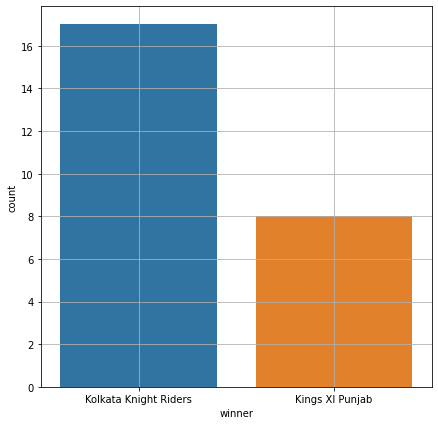

Kolkata Knight Riders    17
Kings XI Punjab           8
Name: winner, dtype: int64


In [8]:
plt.figure(figsize  =(7,7))
sb.countplot(both_team['winner'])
plt.grid()
plt.show()
print(both_team['winner'].value_counts())

In [9]:
# last 3 seasons
recent = both_team[both_team['season'] >= 2017]

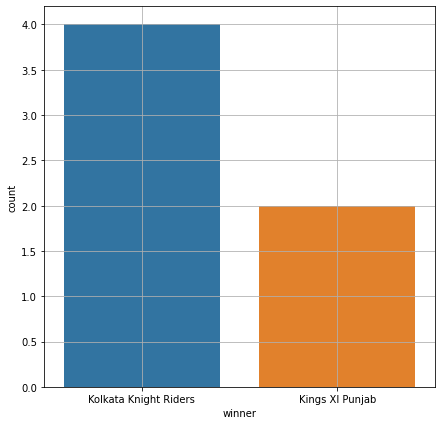

Kolkata Knight Riders    4
Kings XI Punjab          2
Name: winner, dtype: int64


In [10]:
plt.figure(figsize  =(7,7))
sb.countplot(recent['winner'])
plt.grid()
plt.show()
print(recent['winner'].value_counts())

In [11]:
both_team.groupby(['id', 'toss_decision' , 'toss_winner'])['winner'].count()

id     toss_decision  toss_winner          
11     field          Kolkata Knight Riders    1
48     field          Kolkata Knight Riders    1
81     bat            Kings XI Punjab          1
112    bat            Kings XI Punjab          1
123    field          Kolkata Knight Riders    1
142    bat            Kolkata Knight Riders    1
196    bat            Kolkata Knight Riders    1
208    bat            Kolkata Knight Riders    1
270    field          Kolkata Knight Riders    1
325    field          Kolkata Knight Riders    1
330    bat            Kings XI Punjab          1
400    field          Kolkata Knight Riders    1
415    bat            Kings XI Punjab          1
472    field          Kolkata Knight Riders    1
491    field          Kolkata Knight Riders    1
514    field          Kings XI Punjab          1
517    field          Kolkata Knight Riders    1
532    field          Kolkata Knight Riders    1
560    bat            Kings XI Punjab          1
589    field          Kol

In [12]:
recent.groupby(['id', 'toss_decision' , 'toss_winner'])['winner'].count()

id     toss_decision  toss_winner          
11     field          Kolkata Knight Riders    1
48     field          Kolkata Knight Riders    1
7911   field          Kings XI Punjab          1
7937   field          Kings XI Punjab          1
11142  field          Kings XI Punjab          1
11343  field          Kolkata Knight Riders    1
Name: winner, dtype: int64

# Take Aways:
### 1 - From the entire data , KKR has won 17 times ,and KXIP only 8
### 2 - From the last 3 season , KKR have won 4 times ,and KXIP 2 times
### 3 - But , this year KXIP are strong ,with their batting and bowling in good form , their middle order is also good
### 4 - Match ,will be played in Sharjah , and hence Runs will be made in huge

# Ques 1 ans - KXIP

In [14]:
############################################################################################################################

# Ques 2 - Total dots in the match

In [15]:
main_df_team = df[(((df['batting_team'] == 'Kings XI Punjab')  & (df['bowling_team'] == 'Kolkata Knight Riders')) | ((df['batting_team'] == 'Kolkata Knight Riders')  & (df['bowling_team'] == 'Kings XI Punjab')))]
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [16]:
kxp_bowling = main_df_team[(main_df_team['bowling_team'] == 'Kings XI Punjab') & (main_df_team['batting_team'] == 'Kolkata Knight Riders') &(main_df_team['total_runs'] == 0)]

In [17]:
kxp_bowling

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2486,11,2,Kolkata Knight Riders,Kings XI Punjab,1,2,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2488,11,2,Kolkata Knight Riders,Kings XI Punjab,1,4,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2489,11,2,Kolkata Knight Riders,Kings XI Punjab,1,5,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2490,11,2,Kolkata Knight Riders,Kings XI Punjab,1,6,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2491,11,2,Kolkata Knight Riders,Kings XI Punjab,1,7,SP Narine,G Gambhir,Sandeep Sharma,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177145,11343,2,Kolkata Knight Riders,Kings XI Punjab,15,2,AD Russell,S Gill,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177147,11343,2,Kolkata Knight Riders,Kings XI Punjab,15,4,AD Russell,S Gill,Mohammed Shami,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177148,11343,2,Kolkata Knight Riders,Kings XI Punjab,15,5,AD Russell,S Gill,Mohammed Shami,0,...,0,0,0,0,0,0,0,AD Russell,caught,AJ Tye
177153,11343,2,Kolkata Knight Riders,Kings XI Punjab,16,4,S Gill,KD Karthik,S Curran,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [20]:
# kxp dot aginst kkr
kxp_dot = kxp_bowling.pivot_table(index = ['match_id'] , values = ['total_runs' , 'batsman_runs'],aggfunc = ['count' , 'sum'])

In [21]:
kxp_dot = pd.DataFrame(kxp_dot.to_records())
kxp_dot

,match_id,"('count', 'batsman_runs')","('count', 'total_runs')","('sum', 'batsman_runs')","('sum', 'total_runs')"
0,11,25,25,0,0
1,48,38,38,0,0
2,81,46,46,0,0
3,112,50,50,0,0
4,123,26,26,0,0
5,142,46,46,0,0
6,196,40,40,0,0
7,208,36,36,0,0
8,270,43,43,0,0
9,325,40,40,0,0


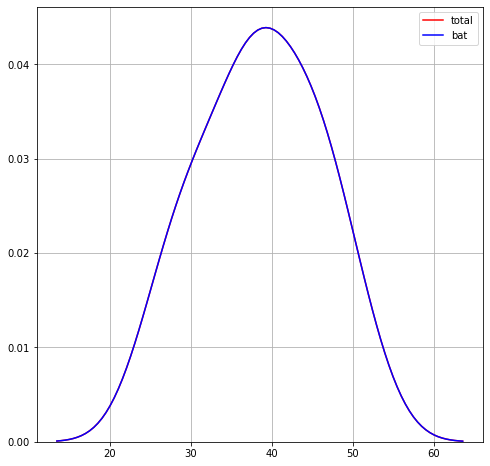

In [23]:
plt.figure(figsize = (8,8))
sb.kdeplot(kxp_dot["('count', 'total_runs')"] , label = 'total' , color= 'red')
sb.kdeplot(kxp_dot["('count', 'batsman_runs')"] , label = 'bat' , color = 'blue')

plt.grid()
plt.show()

In [25]:
print("Median is " , np.median(kxp_dot["('count', 'total_runs')"]))
print("Mode is" , stats.mode(kxp_dot["('count', 'total_runs')"]))
print("Mean is ",kxp_dot["('count', 'total_runs')"].mean())

Median is  40.0
Mode is ModeResult(mode=array([40], dtype=int64), count=array([4]))
Mean is  38.56


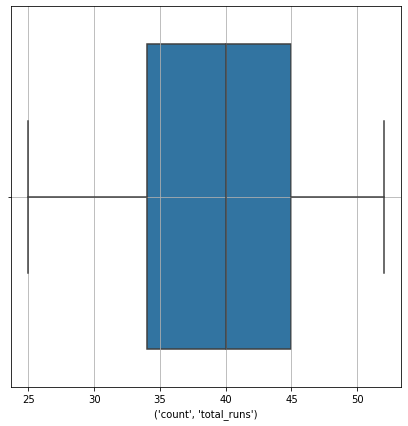

In [28]:
plt.figure(figsize = (7,7))
sb.boxplot(kxp_dot["('count', 'total_runs')"])
plt.grid()
plt.show()

In [29]:
kkr_bowling = main_df_team[(main_df_team['batting_team'] == 'Kings XI Punjab') & (main_df_team['bowling_team'] == 'Kolkata Knight Riders') &(main_df_team['total_runs'] == 0)]

In [30]:
kkr_bowling

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2360,11,1,Kings XI Punjab,Kolkata Knight Riders,1,6,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2363,11,1,Kings XI Punjab,Kolkata Knight Riders,2,3,M Vohra,HM Amla,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2364,11,1,Kings XI Punjab,Kolkata Knight Riders,2,4,M Vohra,HM Amla,UT Yadav,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177031,11343,1,Kings XI Punjab,Kolkata Knight Riders,16,6,S Curran,Mandeep Singh,AD Russell,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177040,11343,1,Kings XI Punjab,Kolkata Knight Riders,18,3,Mandeep Singh,S Curran,H Gurney,0,...,0,0,0,0,0,0,0,Mandeep Singh,caught,RV Uthappa
177042,11343,1,Kings XI Punjab,Kolkata Knight Riders,18,5,R Ashwin,S Curran,H Gurney,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177044,11343,1,Kings XI Punjab,Kolkata Knight Riders,19,1,R Ashwin,S Curran,AD Russell,0,...,0,0,0,0,0,0,0,R Ashwin,bowled,NaN


In [31]:
# kxp dot aginst kkr
kkr_dot = kkr_bowling.pivot_table(index = ['match_id'] , values = ['total_runs' , 'batsman_runs'],aggfunc = ['count' , 'sum'])

In [32]:
kkr_dot

count                     sum           
         batsman_runs total_runs batsman_runs total_runs
match_id                                                
11                 54         54            0          0
48                 37         37            0          0
81                 42         42            0          0
112                42         42            0          0
123                46         46            0          0
142                41         41            0          0
196                45         45            0          0
208                18         18            0          0
270                55         55            0          0
325                45         45            0          0
330                39         39            0          0
400                39         39            0          0
415                43         43            0          0
472                48         48            0          0
491                42         42            0          0
514                52         52            0          0
517                40         40            0          0
532                46         46            0          0
560                40         40            0          0
589                43         43            0          0
608                46         46            0          0
7911               25         25            0          0
7937               32         32            0          0
11142              41         41            0          0
11343              36         36            0          0

In [33]:
kkr_dot = pd.DataFrame(kkr_dot.to_records())
kkr_dot

,match_id,"('count', 'batsman_runs')","('count', 'total_runs')","('sum', 'batsman_runs')","('sum', 'total_runs')"
0,11,54,54,0,0
1,48,37,37,0,0
2,81,42,42,0,0
3,112,42,42,0,0
4,123,46,46,0,0
5,142,41,41,0,0
6,196,45,45,0,0
7,208,18,18,0,0
8,270,55,55,0,0
9,325,45,45,0,0


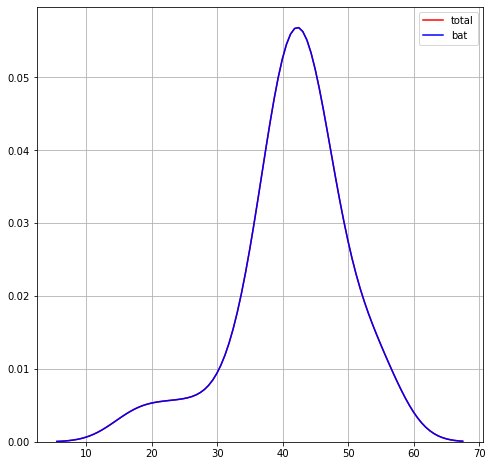

In [34]:
plt.figure(figsize = (8,8))
sb.kdeplot(kkr_dot["('count', 'total_runs')"] , label = 'total' , color= 'red')
sb.kdeplot(kkr_dot["('count', 'batsman_runs')"] , label = 'bat' , color = 'blue')

plt.grid()
plt.show()

In [35]:
print("Median is " , np.median(kkr_dot["('count', 'total_runs')"]))
print("Mode is" , stats.mode(kkr_dot["('count', 'total_runs')"]))
print("Mean is ",kkr_dot["('count', 'total_runs')"].mean())

Median is  42.0
Mode is ModeResult(mode=array([42], dtype=int64), count=array([3]))
Mean is  41.48


In [36]:
# there fore total dot including both team is :
# median =40+42 = 82
# mode = 40 + 42 = 82
# mean = 41.48 + 38.56 = 80.04

In [37]:
# Lets , check wrt to other team

In [40]:
#kxp
kxp_ball_all_bat = df[(((df['bowling_team'] == 'Kings XI Punjab')))]
kxp_bowling_all = kxp_ball_all_bat[(kxp_ball_all_bat['bowling_team'] == 'Kings XI Punjab') &(kxp_ball_all_bat['total_runs'] == 0)]
# kxp dot aginst all
kxp_dot_all = kxp_bowling_all.pivot_table(index = ['match_id'] , values = ['total_runs' , 'batsman_runs'],aggfunc = ['count' , 'sum'])
kxp_dot_all = pd.DataFrame(kxp_dot_all.to_records())
kxp_dot_all

,match_id,"('count', 'batsman_runs')","('count', 'total_runs')","('sum', 'batsman_runs')","('sum', 'total_runs')"
0,4,32,32,0,0
1,8,53,53,0,0
2,11,25,25,0,0
3,15,41,41,0,0
4,19,38,38,0,0
...,...,...,...,...,...
171,11328,36,36,0,0
172,11333,35,35,0,0
173,11339,22,22,0,0
174,11343,30,30,0,0


Median is  40.0
Mode is ModeResult(mode=array([40], dtype=int64), count=array([12]))
Mean is  40.35795454545455


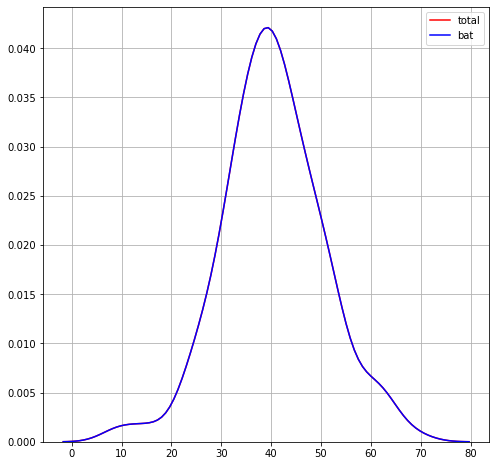

In [41]:
print("Median is " , np.median(kxp_dot_all["('count', 'total_runs')"]))
print("Mode is" , stats.mode(kxp_dot_all["('count', 'total_runs')"]))
print("Mean is ",kxp_dot_all["('count', 'total_runs')"].mean())

plt.figure(figsize = (8,8))
sb.kdeplot(kxp_dot_all["('count', 'total_runs')"] , label = 'total' , color= 'red')
sb.kdeplot(kxp_dot_all["('count', 'batsman_runs')"] , label = 'bat' , color = 'blue')

plt.grid()
plt.show()

In [42]:
#kxp
kkr_ball_all_bat = df[(((df['bowling_team'] == 'Kolkata Knight Riders')))]
kkr_bowling_all = kkr_ball_all_bat[(kkr_ball_all_bat['bowling_team'] == 'Kolkata Knight Riders') &(kkr_ball_all_bat['total_runs'] == 0)]
# kkr dot aginst all
kkr_dot_all = kkr_bowling_all.pivot_table(index = ['match_id'] , values = ['total_runs' , 'batsman_runs'],aggfunc = ['count' , 'sum'])
kkr_dot_all = pd.DataFrame(kkr_dot_all.to_records())
kkr_dot_all

,match_id,"('count', 'batsman_runs')","('count', 'total_runs')","('sum', 'batsman_runs')","('sum', 'total_runs')"
0,3,35,35,0,0
1,7,48,48,0,0
2,11,54,54,0,0
3,14,48,48,0,0
4,18,35,35,0,0
...,...,...,...,...,...
173,11329,19,19,0,0
174,11334,45,45,0,0
175,11338,41,41,0,0
176,11343,36,36,0,0


Median is  41.0
Mode is ModeResult(mode=array([40], dtype=int64), count=array([12]))
Mean is  41.23033707865169


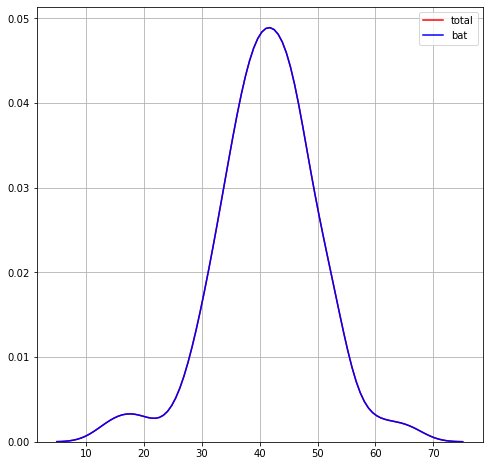

In [43]:
print("Median is " , np.median(kkr_dot_all["('count', 'total_runs')"]))
print("Mode is" , stats.mode(kkr_dot_all["('count', 'total_runs')"]))
print("Mean is ",kkr_dot_all["('count', 'total_runs')"].mean())

plt.figure(figsize = (8,8))
sb.kdeplot(kkr_dot_all["('count', 'total_runs')"] , label = 'total' , color= 'red')
sb.kdeplot(kkr_dot_all["('count', 'batsman_runs')"] , label = 'bat' , color = 'blue')

plt.grid()
plt.show()

In [44]:
# Total dot against all team is :
# mean =41 + 40 = 81
# mode = 40 + 40 = 80
# median = 40 + 41 = 81


# Take Aways :
### Total dot against all team is :
### mean =41 + 40 = 81
### mode = 40 + 40 = 80
### median = 40 + 41 = 81 

### there fore total dot including both team wrt each other is :
### median =40+42 = 82
### mode = 40 + 42 = 82
### mean = 41.48 + 38.56 = 80.04

### also , match is played in Sharjah , small ground , hence dot will be less , <70

# Ques 2 ans - (60-90)

In [45]:
############################################################################################################################

# Ques 3 - Wicket fall from 15th over till last including both

In [46]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [50]:
#kxp wicket wrt to kkr
kxp_wicket = main_df_team[(main_df_team['batting_team'] == 'Kings XI Punjab') & (main_df_team['over'] >= 15)]
kxp_wicket

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2447,11,1,Kings XI Punjab,Kolkata Knight Riders,15,1,DA Miller,WP Saha,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2448,11,1,Kings XI Punjab,Kolkata Knight Riders,15,2,WP Saha,DA Miller,PP Chawla,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
2449,11,1,Kings XI Punjab,Kolkata Knight Riders,15,3,WP Saha,DA Miller,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2450,11,1,Kings XI Punjab,Kolkata Knight Riders,15,4,DA Miller,WP Saha,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2451,11,1,Kings XI Punjab,Kolkata Knight Riders,15,5,WP Saha,DA Miller,PP Chawla,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177051,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,2,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177052,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,3,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177053,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,4,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177054,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,5,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [54]:
kxp_w = kxp_wicket.pivot_table(index = ['match_id'],values = ['player_dismissed','total_runs'] , aggfunc = ['count','sum'])

In [55]:
kxp_w = pd.DataFrame(kxp_w.to_records())
kxp_w

,match_id,"('count', 'player_dismissed')","('count', 'total_runs')","('sum', 'total_runs')"
0,11,5,38,51
1,48,3,37,62
2,81,1,39,67
3,112,4,37,53
4,123,3,40,54
5,142,1,36,45
6,196,2,37,47
7,208,0,26,55
8,270,2,36,39
9,325,6,36,49


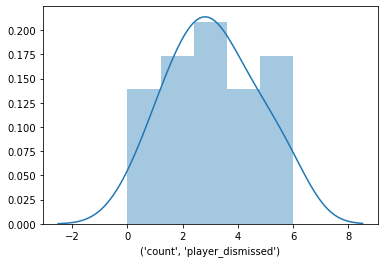

In [57]:
sb.distplot(kxp_w["('count\', \'player_dismissed\')"])

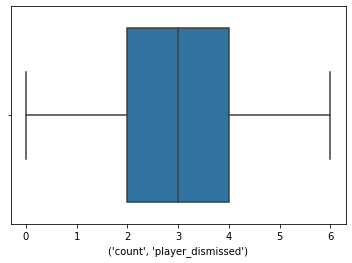

In [58]:
sb.boxplot(kxp_w["('count\', \'player_dismissed\')"])

In [59]:
print("Median is " , np.median(kxp_w["('count\', \'player_dismissed\')"]))
print("Mode is" , stats.mode(kxp_w["('count\', \'player_dismissed\')"]))
print("Mean is ",kxp_w["('count\', \'player_dismissed\')"].mean())

Median is  3.0
Mode is ModeResult(mode=array([3], dtype=int64), count=array([6]))
Mean is  3.0833333333333335


In [60]:
#kkr wicket wrt to kxp
kkr_wicket = main_df_team[(main_df_team['batting_team'] == 'Kolkata Knight Riders') & (main_df_team['over'] >= 15)]
kkr_wicket

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2574,11,2,Kolkata Knight Riders,Kings XI Punjab,15,1,G Gambhir,MK Pandey,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2575,11,2,Kolkata Knight Riders,Kings XI Punjab,15,2,MK Pandey,G Gambhir,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2576,11,2,Kolkata Knight Riders,Kings XI Punjab,15,3,G Gambhir,MK Pandey,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2577,11,2,Kolkata Knight Riders,Kings XI Punjab,15,4,MK Pandey,G Gambhir,MM Sharma,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2578,11,2,Kolkata Knight Riders,Kings XI Punjab,15,5,MK Pandey,G Gambhir,MM Sharma,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [61]:
kkr_w = kkr_wicket.pivot_table(index = ['match_id'],values = ['player_dismissed','total_runs'] , aggfunc = ['count','sum'])
kkr_w = pd.DataFrame(kkr_w.to_records())
kkr_w

,match_id,"('count', 'player_dismissed')","('count', 'total_runs')","('sum', 'total_runs')"
0,11,0,15,23
1,48,3,36,47
2,81,1,36,84
3,112,3,34,79
4,142,1,37,75
5,196,3,39,59
6,208,2,38,67
7,270,0,21,25
8,325,2,36,47
9,330,0,15,30


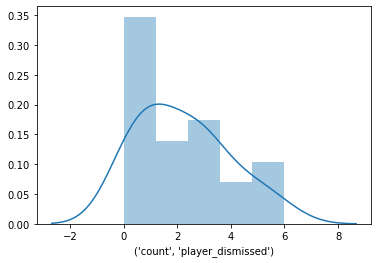

In [62]:
sb.distplot(kkr_w["('count\', \'player_dismissed\')"])

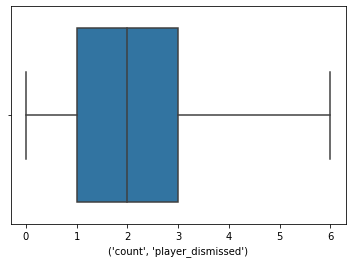

In [63]:
sb.boxplot(kkr_w["('count\', \'player_dismissed\')"])

In [64]:
print("Median is " , np.median(kkr_w["('count\', \'player_dismissed\')"]))
print("Mode is" , stats.mode(kkr_w["('count\', \'player_dismissed\')"]))
print("Mean is ",kkr_w["('count\', \'player_dismissed\')"].mean())

Median is  2.0
Mode is ModeResult(mode=array([1], dtype=int64), count=array([6]))
Mean is  2.2083333333333335


In [65]:
# total wicket wrt to each other
# median = 2+3 = 5
# mode =1 + 3 = 4
# mean = 2 + 3 = 5

In [66]:
# lets check now wrt all team

In [68]:
#kxp
kxp_bat_all = df[(((df['batting_team'] == 'Kings XI Punjab') & (df['over'] >= 15)))]
kxp_w_all = kxp_bat_all.pivot_table(index = ['match_id'],values = ['player_dismissed','total_runs'] , aggfunc = ['count','sum'])
kxp_w_all = pd.DataFrame(kxp_w_all.to_records())

kxp_w_all

,match_id,"('count', 'player_dismissed')","('count', 'total_runs')","('sum', 'total_runs')"
0,4,0,31,48
1,8,0,3,7
2,11,5,38,51
3,15,3,36,47
4,19,4,38,70
...,...,...,...,...
162,11328,2,38,57
163,11333,4,37,51
164,11339,3,38,49
165,11343,2,36,70


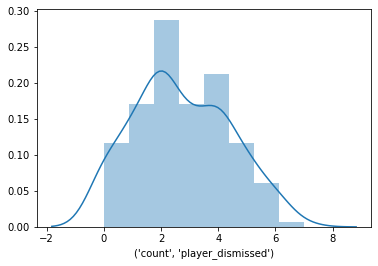

In [69]:
sb.distplot(kxp_w_all["('count\', \'player_dismissed\')"])

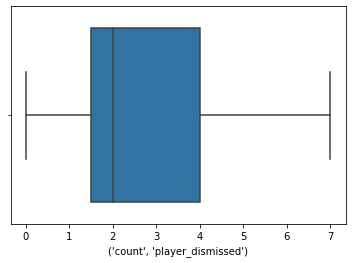

In [70]:
sb.boxplot(kxp_w_all["('count\', \'player_dismissed\')"])

In [71]:
print("Median is " , np.median(kxp_w_all["('count\', \'player_dismissed\')"]))
print("Mode is" , stats.mode(kxp_w_all["('count\', \'player_dismissed\')"]))
print("Mean is ",kxp_w_all["('count\', \'player_dismissed\')"].mean())

Median is  2.0
Mode is ModeResult(mode=array([2], dtype=int64), count=array([42]))
Mean is  2.718562874251497


In [72]:
#kkr
kkr_bat_all = df[(((df['batting_team'] == 'Kolkata Knight Riders') & (df['over'] >= 15)))]
kkr_w_all = kkr_bat_all.pivot_table(index = ['match_id'],values = ['player_dismissed','total_runs'] , aggfunc = ['count','sum'])
kkr_w_all = pd.DataFrame(kkr_w_all.to_records())

kkr_w_all

,match_id,"('count', 'player_dismissed')","('count', 'total_runs')","('sum', 'total_runs')"
0,3,0,7,22
1,7,3,38,71
2,11,0,15,23
3,14,4,39,55
4,18,3,36,44
...,...,...,...,...
163,11329,4,37,51
164,11334,2,39,82
165,11338,1,39,94
166,11343,1,25,42


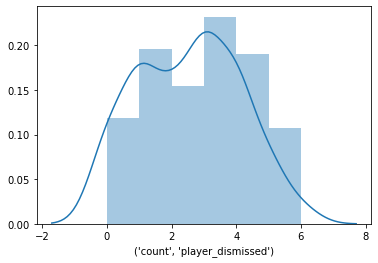

In [73]:
sb.distplot(kkr_w_all["('count\', \'player_dismissed\')"])

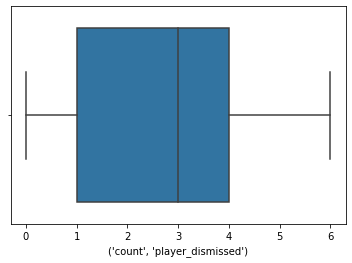

In [74]:
sb.boxplot(kkr_w_all["('count\', \'player_dismissed\')"])

In [75]:
print("Median is " , np.median(kkr_w_all["('count\', \'player_dismissed\')"]))
print("Mode is" , stats.mode(kkr_w_all["('count\', \'player_dismissed\')"]))
print("Mean is ",kkr_w_all["('count\', \'player_dismissed\')"].mean())

Median is  3.0
Mode is ModeResult(mode=array([3], dtype=int64), count=array([39]))
Mean is  2.5238095238095237


In [76]:
# total wicket haul wrt all team
# mean = 3+3 = 6
# mode = 3 + 2 = 5
# median = 3 +2 = 5

[]

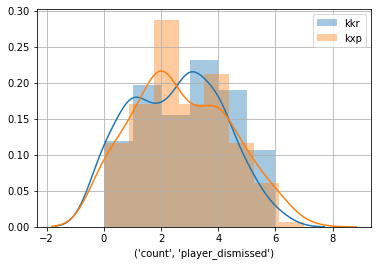

In [80]:
sb.distplot(kkr_w_all["('count\', \'player_dismissed\')"] , label = 'kkr')
sb.distplot(kxp_w_all["('count\', \'player_dismissed\')"] , label = 'kxp')

plt.legend()
plt.grid()
plt.plot()

[]

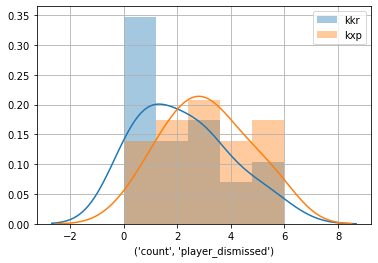

In [79]:
sb.distplot(kkr_w["('count\', \'player_dismissed\')"] , label = 'kkr')
sb.distplot(kxp_w["('count\', \'player_dismissed\')"] , label = 'kxp')
plt.legend()
plt.grid()
plt.plot()

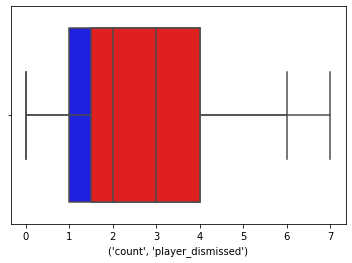

In [84]:
sb.boxplot(kkr_w_all["('count\', \'player_dismissed\')"] , color= 'blue' )
sb.boxplot(kxp_w_all["('count\', \'player_dismissed\')"] , color = 'red' )

plt.show()

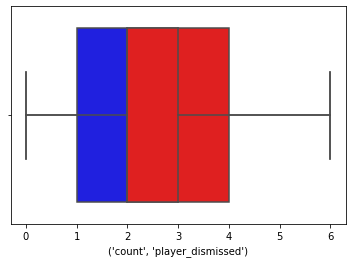

In [85]:
sb.boxplot(kkr_w["('count\', \'player_dismissed\')"] , color= 'blue' )
sb.boxplot(kxp_w["('count\', \'player_dismissed\')"] , color = 'red' )

plt.show()

# Take Aways:
### total wicket haul wrt all team
### mean = 3+3 = 6
### mode = 3 + 2 = 5
### median = 3 +2 = 5

### total wicket wrt to each other
### median = 2+3 = 5
### mode =1 + 3 = 4
### mean = 2 + 3 = 5

# Ques 3 ans - (4-6)

In [87]:
##############################################################################################################################

# Ques 4 - Maxwell contribution

In [91]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [100]:
main_df_team['batsman'].unique()

array(['HM Amla', 'M Vohra', 'MP Stoinis', 'GJ Maxwell', 'DA Miller',
       'WP Saha', 'MM Sharma', 'AR Patel', 'VR Aaron', 'SP Narine',
       'G Gambhir', 'RV Uthappa', 'MK Pandey', 'MJ Guptill', 'SE Marsh',
       'Swapnil Singh', 'R Tewatia', 'CA Lynn', 'YK Pathan',
       'C de Grandhomme', 'CR Woakes', 'JR Hopes', 'KC Sangakkara',
       'Yuvraj Singh', 'DPMD Jayawardene', 'K Goel', 'IK Pathan',
       'PP Chawla', 'Mohammad Hafeez', 'SC Ganguly', 'BJ Hodge', 'DB Das',
       'LR Shukla', 'DJ Hussey', 'AB Agarkar', 'TM Srivastava',
       'Salman Butt', 'A Chopra', 'Umar Gul', 'I Sharma', 'RS Bopara',
       'T Kohli', 'BB McCullum', 'CH Gayle', 'MN van Wyk', 'S Sohal',
       'SM Katich', 'Mandeep Singh', 'MK Tiwary', 'AD Mathews',
       'MS Bisla', 'B Lee', 'AC Gilchrist', 'PC Valthaty', 'KD Karthik',
       'AM Nayar', 'Bipul Sharma', 'P Kumar', 'JH Kallis', 'EJG Morgan',
       'P Dogra', 'AD Mascarenhas', 'Harmeet Singh', 'BA Bhatt',
       'Shakib Al Hasan', 'RN ten Doesc

In [101]:
kxp = main_df_team[main_df_team['batting_team'] == 'Kings XI Punjab']

In [102]:
total = kxp.pivot_table(index= ['match_id'], values = ['total_runs'] , aggfunc = ['sum'])
total

,sum
,total_runs
match_id,
11,170
48,167
81,178
112,174
123,158
142,154
196,144
208,204


In [103]:
maxwell = main_df_team[main_df_team['batsman'] == 'GJ Maxwell']
maxwell

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2407,11,1,Kings XI Punjab,Kolkata Knight Riders,8,5,GJ Maxwell,HM Amla,SP Narine,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2409,11,1,Kings XI Punjab,Kolkata Knight Riders,9,1,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2410,11,1,Kings XI Punjab,Kolkata Knight Riders,9,2,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2411,11,1,Kings XI Punjab,Kolkata Knight Riders,9,3,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2414,11,1,Kings XI Punjab,Kolkata Knight Riders,9,6,GJ Maxwell,HM Amla,CR Woakes,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143900,608,2,Kings XI Punjab,Kolkata Knight Riders,15,2,GJ Maxwell,DA Miller,Shakib Al Hasan,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
143901,608,2,Kings XI Punjab,Kolkata Knight Riders,15,3,GJ Maxwell,DA Miller,Shakib Al Hasan,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
143904,608,2,Kings XI Punjab,Kolkata Knight Riders,15,6,GJ Maxwell,DA Miller,Shakib Al Hasan,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
143906,608,2,Kings XI Punjab,Kolkata Knight Riders,16,2,GJ Maxwell,DA Miller,PP Chawla,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [104]:
maxi = maxwell.pivot_table(index= ['match_id'], values = ['batsman_runs'] , aggfunc = ['sum'])
maxi

,sum
,batsman_runs
match_id,
11,25
48,44
472,15
491,14
514,6
517,0
532,33
560,43


In [105]:
total = pd.DataFrame(total.to_records())
maxi = pd.DataFrame(maxi.to_records())

In [106]:
main_max = pd.merge(total , maxi, how = 'inner' , on = 'match_id' , )

In [107]:
main_max

,match_id,"('sum', 'total_runs')","('sum', 'batsman_runs')"
0,11,170,25
1,48,167,44
2,472,132,15
3,491,149,14
4,514,135,6
5,517,199,0
6,532,155,33
7,560,183,43
8,589,138,4
9,608,157,68


In [108]:
main_max['contri'] = (main_max["('sum\', \'batsman_runs\')"] / main_max["('sum', 'total_runs')"])*100

In [109]:
main_max

,match_id,"('sum', 'total_runs')","('sum', 'batsman_runs')",contri
0,11,170,25,14.705882
1,48,167,44,26.347305
2,472,132,15,11.363636
3,491,149,14,9.395973
4,514,135,6,4.444444
5,517,199,0,0.000000
6,532,155,33,21.290323
7,560,183,43,23.497268
8,589,138,4,2.898551
9,608,157,68,43.312102


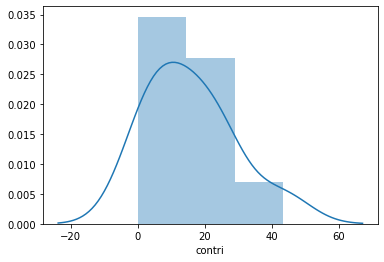

In [110]:
sb.distplot(main_max['contri'])

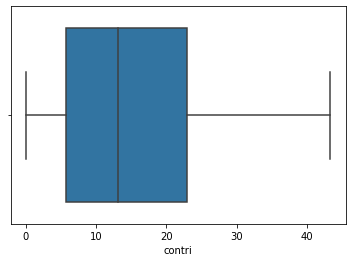

In [111]:
sb.boxplot(main_max['contri'])

In [114]:
print("Mean is " , main_max['contri'].mean())
print("median is " , np.median(main_max['contri']))
print("Mean is " , stats.mode(main_max['contri']))


Mean is  15.725548468027966
median is  13.03475935828877
Mean is  ModeResult(mode=array([0.]), count=array([1]))


In [130]:
# lets check wrt to all team

In [134]:
maxwell_all = df[(((df['batting_team'] == 'Kings XI Punjab')))]

In [135]:
maxwell_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
838,4,2,Kings XI Punjab,Rising Pune Supergiant,1,1,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
839,4,2,Kings XI Punjab,Rising Pune Supergiant,1,2,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
840,4,2,Kings XI Punjab,Rising Pune Supergiant,1,3,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
841,4,2,Kings XI Punjab,Rising Pune Supergiant,1,4,HM Amla,M Vohra,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
842,4,2,Kings XI Punjab,Rising Pune Supergiant,1,5,M Vohra,HM Amla,AB Dinda,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177869,11346,2,Kings XI Punjab,Chennai Super Kings,18,3,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
177870,11346,2,Kings XI Punjab,Chennai Super Kings,18,4,S Curran,Mandeep Singh,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177871,11346,2,Kings XI Punjab,Chennai Super Kings,18,5,Mandeep Singh,S Curran,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
177872,11346,2,Kings XI Punjab,Chennai Super Kings,17,6,Mandeep Singh,S Curran,RA Jadeja,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [136]:
kxp_total = maxwell_all.pivot_table(index= ['match_id'], values = ['total_runs'] , aggfunc = ['sum'])
kxp_total

,sum
,total_runs
match_id,
4,164
8,150
11,170
15,137
19,154
...,...
11328,168
11333,190


In [137]:
kxp_max_all = maxwell_all[maxwell_all['batsman'] == 'GJ Maxwell']
maxwell_all
kxp_max_all

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
910,4,2,Kings XI Punjab,Rising Pune Supergiant,12,2,GJ Maxwell,DA Miller,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
912,4,2,Kings XI Punjab,Rising Pune Supergiant,12,4,GJ Maxwell,DA Miller,Imran Tahir,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
915,4,2,Kings XI Punjab,Rising Pune Supergiant,13,1,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
916,4,2,Kings XI Punjab,Rising Pune Supergiant,13,2,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
918,4,2,Kings XI Punjab,Rising Pune Supergiant,13,4,GJ Maxwell,DA Miller,RD Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144772,612,1,Kings XI Punjab,Delhi Daredevils,17,6,GJ Maxwell,WP Saha,A Mishra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
144775,612,1,Kings XI Punjab,Delhi Daredevils,18,3,GJ Maxwell,WP Saha,CH Morris,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
144778,612,1,Kings XI Punjab,Delhi Daredevils,18,6,GJ Maxwell,WP Saha,CH Morris,0,...,0,0,0,0,0,0,0,GJ Maxwell,bowled,NaN
146563,619,2,Kings XI Punjab,Mumbai Indians,16,5,GJ Maxwell,M Vijay,MJ McClenaghan,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN


In [138]:
maxi = kxp_max_all.pivot_table(index= ['match_id'], values = ['batsman_runs'] , aggfunc = ['sum'])
maxi

,sum
,batsman_runs
match_id,
4,44
8,43
11,25
15,0
19,10
22,40
26,31
32,0


In [139]:
total = pd.DataFrame(kxp_total.to_records())
maxi = pd.DataFrame(maxi.to_records())

In [140]:
main_max = pd.merge(total , maxi, how = 'inner' , on = 'match_id' , )


In [141]:
main_max

,match_id,"('sum', 'total_runs')","('sum', 'batsman_runs')"
0,4,164,44
1,8,150,43
2,11,170,25
3,15,137,0
4,19,154,10
5,22,198,40
6,26,188,31
7,32,181,0
8,42,138,6
9,46,189,20


In [142]:
main_max['contri'] = (main_max["('sum\', \'batsman_runs\')"] / main_max["('sum', 'total_runs')"])*100

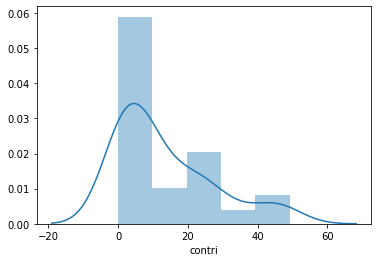

In [143]:
sb.distplot(main_max['contri'])

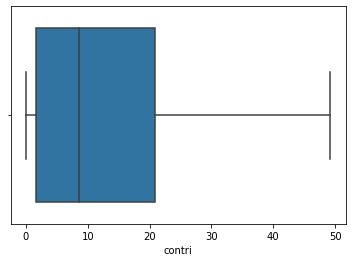

In [144]:
sb.boxplot(main_max['contri'])

In [145]:
print("Mean is " , main_max['contri'].mean())
print("median is " , np.median(main_max['contri']))
print("Mean is " , stats.mode(main_max['contri']))


Mean is  13.310835582319019
median is  8.662313745186673
Mean is  ModeResult(mode=array([0.]), count=array([8]))


# Take aways:
### 1 - The mean of maxwell is 14 wrt all team ,and 15 wrt kkr
### 2 -Generally , he comes at 4th or 5th position , hence okkaish chances of contribution
### 3 -Since ,match is in sharjah , he will score more

# Ques 4 ans - (8 -14)

In [147]:
##################################################################################################################################3333

# Ques 5  - no ball ?

In [148]:
main_df_team

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177164,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,3,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177165,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,4,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,1,1,2,NaN,NaN,NaN
177166,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,5,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177167,11343,2,Kolkata Knight Riders,Kings XI Punjab,18,6,KD Karthik,S Gill,S Curran,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [151]:
kkr_no = main_df_team[main_df_team['bowling_team'] == 'Kolkata Knight Riders']

In [152]:
kkr_no

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2355,11,1,Kings XI Punjab,Kolkata Knight Riders,1,1,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2356,11,1,Kings XI Punjab,Kolkata Knight Riders,1,2,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
2357,11,1,Kings XI Punjab,Kolkata Knight Riders,1,3,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2358,11,1,Kings XI Punjab,Kolkata Knight Riders,1,4,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
2359,11,1,Kings XI Punjab,Kolkata Knight Riders,1,5,HM Amla,M Vohra,TA Boult,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177051,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,2,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
177052,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,3,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
177053,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,4,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN
177054,11343,1,Kings XI Punjab,Kolkata Knight Riders,20,5,S Curran,AJ Tye,H Gurney,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [153]:
kkr_no_ball = kkr_no[kkr_no['noball_runs'] != 0]
kkr_no_ball

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2442,11,1,Kings XI Punjab,Kolkata Knight Riders,14,4,DA Miller,WP Saha,C de Grandhomme,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
2443,11,1,Kings XI Punjab,Kolkata Knight Riders,14,5,DA Miller,WP Saha,C de Grandhomme,0,...,0,0,1,0,6,1,7,NaN,NaN,NaN
18963,81,1,Kings XI Punjab,Kolkata Knight Riders,18,2,KC Sangakkara,IK Pathan,I Sharma,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
111713,472,1,Kings XI Punjab,Kolkata Knight Riders,2,1,CA Pujara,V Sehwag,M Morkel,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
122560,517,1,Kings XI Punjab,Kolkata Knight Riders,16,4,M Vohra,WP Saha,SP Narine,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [155]:
kkr_p = kkr_no_ball.pivot_table(index = ['match_id'] , values = ['noball_runs'] , aggfunc=['count','sum'])
kkr_p

,count,sum
,noball_runs,noball_runs
match_id,,
11,2,2
81,1,1
472,1,1
517,1,1


In [156]:
kxp_no = main_df_team[main_df_team['bowling_team'] == 'Kings XI Punjab']
kxp_no_ball = kxp_no[kxp_no['noball_runs'] != 0]
kxp_p = kxp_no_ball.pivot_table(index = ['match_id'] , values = ['noball_runs'] , aggfunc=['count','sum'])
kxp_p

,count,sum
,noball_runs,noball_runs
match_id,,
196,2,2
208,1,1
415,1,1
7911,1,1
11142,1,1


In [157]:
kxp_p = pd.DataFrame(kxp_p.to_records())
kkr_p = pd.DataFrame(kkr_p.to_records())
print(kkr_p , kxp_p)


   match_id  ('count', 'noball_runs')  ('sum', 'noball_runs')
0        11                         2                       2
1        81                         1                       1
2       472                         1                       1
3       517                         1                       1    match_id  ('count', 'noball_runs')  ('sum', 'noball_runs')
0       196                         2                       2
1       208                         1                       1
2       415                         1                       1
3      7911                         1                       1
4     11142                         1                       1


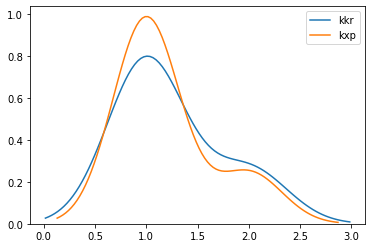

In [160]:
sb.kdeplot(kkr_p["('count\', \'noball_runs\')"] , label = 'kkr')
sb.kdeplot(kxp_p["('count\', \'noball_runs\')"] , label = 'kxp')

plt.legend()
plt.show()

In [161]:
# both team throws 1 no ball

In [162]:
# lets look wrt to other teams

In [163]:
kxp_all_ball = df[(((df['bowling_team'] == 'Kings XI Punjab')))]
kkr_all_ball = df[(((df['bowling_team'] == 'Kolkata Knight Riders')))]


    match_id  ('count', 'noball_runs')  ('sum', 'noball_runs')
0         11                         2                       2
1         23                         1                       1
2         27                         2                       2
3         64                         2                       2
4         71                         1                       1
5         75                         1                       1
6         78                         4                       4
7         81                         1                       1
8         88                         1                       1
9         92                         4                       4
10        99                         1                       1
11       138                         1                       1
12       156                         2                       2
13       163                         2                       2
14       175                         2                 

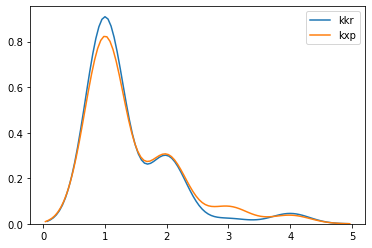

In [164]:
kkr_no_ball_all = kkr_all_ball[kkr_all_ball['noball_runs'] != 0]
kxp_no_ball_all = kxp_all_ball[kxp_all_ball['noball_runs'] != 0]

kkr_p_all = kkr_no_ball_all.pivot_table(index = ['match_id'] , values = ['noball_runs'] , aggfunc=['count','sum'])
kxp_p_all = kxp_no_ball_all.pivot_table(index = ['match_id'] , values = ['noball_runs'] , aggfunc=['count','sum'])



kxp_p = pd.DataFrame(kxp_p_all.to_records())
kkr_p = pd.DataFrame(kkr_p_all.to_records())
print(kkr_p , kxp_p)



sb.kdeplot(kkr_p["('count\', \'noball_runs\')"] , label = 'kkr')
sb.kdeplot(kxp_p["('count\', \'noball_runs\')"] , label = 'kxp')

plt.legend()
plt.show()

In [165]:
# Both team throws 1 no ball each wrt all team

# Take Aways : 
### 1 - Both team throws 1 no ball wrt each other
### 2 - Both team throws 1 no ball wrt all team

# Ques 5 ans - (2-3)